In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from outliers import smirnov_grubbs as grubbs

mu, sigma = 10, 3.0
pob = [int(_) for _ in list(np.random.normal(mu, sigma, 1000))]
pob_array = np.array(pob)

In [2]:
# Pruebas iniciales
max_outlier = grubbs.max_test_outliers(pob_array, 0.5)
min_outlier = grubbs.min_test_outliers(pob_array, 0.5)
print("Anomalías extremas (Máximas): {}".format(max_outlier))
print("Anomalías extremas (Mínimas): {}".format(min_outlier))

Anomalías extremas (Máximas): []
Anomalías extremas (Mínimas): []


In [3]:
def stepAnalysis(initial_pob, alpha):
    max_out = grubbs.max_test_outliers(initial_pob, alpha) 
    min_out = grubbs.min_test_outliers(initial_pob, alpha)
    print("========= Análisis Inicial =========")
    print("Anomalías extremas (Máximas): {}".format(max_out))
    print("Anomalías extremas (Mínimas): {}".format(min_out))
    print("Adición de valores y verificación de anomalías.")
    for i in range(10):
        print("-------------------------")
        pos_value = mu + 2*i
        neg_value = mu - 2*i
        print("Valor nuevo postivio: {}".format(pos_value))
        print("Valor nuevo negativo: {}".format(neg_value))
        aux_array = np.append(np.append(initial_pob, pos_value), neg_value)
        max_test = grubbs.max_test_outliers(aux_array, alpha)
        min_test = grubbs.min_test_outliers(aux_array, alpha)
        if len(max_test) == 0 and len(min_test) == 0:
            print("No hay anomalías en ningún extremo.")
        elif len(max_test) == 1 and len(min_test) == 0:
            dist = abs(max_test[0] - mu)
            print("Hay anomalía máxima: {}".format(max_test[0]))
            print("Distancia de la media: {}".format(dist))
        elif len(max_test) == 0 and len(min_test) == 1:
            dist = abs(mu - min_test[0] )
            print("Hay anomalía mínima: {}".format(min_test[0]))
            print("Distancia de la media: {}".format(dist))
        elif len(max_test) == 1 and len(min_test) == 1:
            max_dist = abs(max_test[0] - mu)
            min_dist = abs(mu - min_test[0])
            print("Hay anomalías en ambos casos. Max: {}. Min: {}".format(max_test[0], min_test[0]))
            print("Distancia Max: {}".format(max_dist))
            print("Distancia Min: {}".format(min_dist))
stepAnalysis(pob_array, 0.05)

========= Análisis Inicial =========
Anomalías extremas (Máximas): []
Anomalías extremas (Mínimas): []
Adición de valores y verificación de anomalías.
-------------------------
Valor nuevo postivio: 10
Valor nuevo negativo: 10
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 12
Valor nuevo negativo: 8
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 14
Valor nuevo negativo: 6
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 16
Valor nuevo negativo: 4
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 18
Valor nuevo negativo: 2
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 20
Valor nuevo negativo: 0
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 22
Valor nuevo negativo: -2
Hay anomalía máxima: 22
Distancia de la media: 12
-------------------------
Valor nuevo postivio: 24
Valor

In [9]:
stepAnalysis(pob_array, 0.0001)

========= Análisis Inicial =========
Anomalías extremas (Máximas): []
Anomalías extremas (Mínimas): []
Adición de valores y verificación de anomalías.
-------------------------
Valor nuevo postivio: 10
Valor nuevo negativo: 10
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 12
Valor nuevo negativo: 8
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 14
Valor nuevo negativo: 6
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 16
Valor nuevo negativo: 4
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 18
Valor nuevo negativo: 2
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 20
Valor nuevo negativo: 0
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 22
Valor nuevo negativo: -2
No hay anomalías en ningún extremo.
-------------------------
Valor nuevo postivio: 24
Valor nuevo negativ

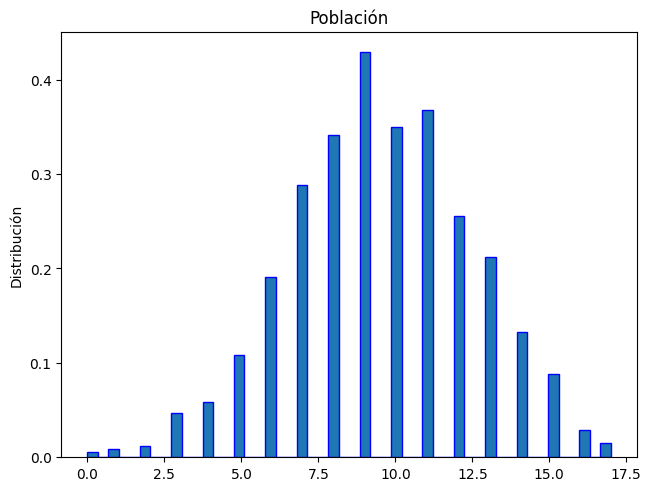

In [10]:
def graph_pob(population, save_name):
    fig, ax = plt.subplots(1, 1, sharey = True, layout = 'constrained')
    ax.hist(population, bins = 50, density = True, fill = True, edgecolor = 'blue')
    ax.set_ylabel('Distribución')
    ax.set_title('Población')
    ##plt.savefig(r'C:\Users\Frank\Documents\GitHub\PCIC\Detección de Anomalías\Imágenes\{}.png'.format(save_name))
    plt.show()

graph_pob(pob, "Población_Gauss_10_3")